In [1]:
from sklearn.model_selection import train_test_split  
import pandas as pd 
import numpy as np
import nibabel as nib


# Organizando o Dataset

In [2]:
df = pd.read_csv('metadados_redimensionados')

In [3]:
df

,Unnamed: 0,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Path,Qt_fatias,Caminho_padronizado,Caminho_Reduzido
0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,181,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
1,1,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,405,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
2,2,HUST-Union Hospital,Patient 11,39,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,308,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
3,3,HUST-Union Hospital,Patient 13,67,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
4,4,HUST-Union Hospital,Patient 15,53,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,445,HUST-Liyuan Hospital,Patient 883,65,Female,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,249,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
446,446,HUST-Liyuan Hospital,Patient 887,61,Male,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,241,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
447,447,HUST-Liyuan Hospital,Patient 888,56,Female,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,233,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
448,448,HUST-Liyuan Hospital,Patient 894,88,Male,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,274,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...


In [4]:
df['Morbidity'].value_counts()

Regula/Mild              269
Severe/Critically ill    181
Name: Morbidity, dtype: int64

## Definindo a quantidade de amostras por classe

In [5]:
df_regular_mild = df[df['Morbidity'] == 'Regula/Mild'].iloc[:181]
df_severe_critical = df[df['Morbidity'] == 'Severe/Critically ill'].iloc[:181]

In [6]:
df_regular_mild = df_regular_mild[['Morbidity','Caminho_Reduzido']]
df_severe_critical = df_severe_critical[['Morbidity','Caminho_Reduzido']]

In [7]:
df_regular_mild

,Morbidity,Caminho_Reduzido
0,Regula/Mild,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
1,Regula/Mild,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
2,Regula/Mild,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
5,Regula/Mild,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
6,Regula/Mild,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
...,...,...
275,Regula/Mild,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
276,Regula/Mild,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
277,Regula/Mild,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
278,Regula/Mild,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...


In [8]:
df_severe_critical

,Morbidity,Caminho_Reduzido
3,Severe/Critically ill,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
4,Severe/Critically ill,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
8,Severe/Critically ill,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
9,Severe/Critically ill,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
14,Severe/Critically ill,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
...,...,...
445,Severe/Critically ill,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
446,Severe/Critically ill,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
447,Severe/Critically ill,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
448,Severe/Critically ill,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...


In [9]:
df_amostras = pd.concat([df_regular_mild,df_severe_critical])

In [10]:
df_amostras = df_amostras.iloc[np.random.permutation(362)]

In [11]:
df_amostras.replace({'Regula/Mild':0,'Severe/Critically ill':1},inplace=True)

In [12]:
path_images = df_amostras['Caminho_Reduzido'].values.tolist()

# Dividindo os dados em treino/validação e teste

In [13]:
X_train, X_test,y_train, y_test = train_test_split(df_amostras['Caminho_Reduzido'],df_amostras['Morbidity'], test_size=0.2)

In [14]:
X_train.shape

(289,)

In [15]:
X = nib.load(X_train.iloc[0]).get_fdata()
X = np.reshape(X,(1,150,64,64,1))

for path in X_train.iloc[1:]:
    data = nib.load(path).get_fdata()
    data = np.reshape(data,(1,150,64,64,1))
    
    X = np.vstack((X,data))

In [16]:
teste = nib.load(X_test.iloc[0]).get_fdata()
teste = np.reshape(teste, (1,150,64,64,1))

for path in X_test.iloc[1:]:
    dado = nib.load(path).get_fdata()
    dado = np.reshape(dado, (1,150,64,64,1))
    
    teste = np.vstack((teste,dado))

In [17]:
X.shape

(289, 150, 64, 64, 1)

In [18]:
y_train.shape

(289,)

# Modelos

In [19]:
import tensorflow as tf
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score, precision_score, recall_score

In [20]:
y = tf.keras.utils.to_categorical(y_train,num_classes=2)

In [37]:
y_teste = tf.keras.utils.to_categorical(y_test,num_classes=2)

In [22]:
y.shape

(289, 2)

## ConvLSTM

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.ConvLSTM2D(filters=16,
                                     kernel_size=[4,4],
                                     padding = 'same',
                                     data_format='channels_last',
                                     return_sequences = True,input_shape = (150,64,64,1)))
model.add(tf.keras.layers.MaxPooling3D(pool_size = (3,3,3),padding = 'valid', data_format = 'channels_last'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50,activation ='relu'))
model.add(tf.keras.layers.Dense(25,activation = "relu"))
model.add(tf.keras.layers.Dense(2,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 150, 64, 64, 16)   17472     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 50, 21, 21, 16)    0         
_________________________________________________________________
flatten (Flatten)            (None, 352800)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                17640050  
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 52        
Total params: 17,658,849
Trainable params: 17,658,849
Non-trainable params: 0
____________________________________________

In [24]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [25]:
with tf.device('CPU'):
    history = model.fit(x=X,y=y,
                    validation_split=0.1,
                    epochs = 10,
                    batch_size = 16
                    )

Epoch 1/10
17/17 [==============================] - 519s 30s/step - loss: 3.8816 - accuracy: 0.5577 - val_loss: 0.6830 - val_accuracy: 0.5517
Epoch 2/10
17/17 [==============================] - 506s 30s/step - loss: 0.7622 - accuracy: 0.6462 - val_loss: 0.6690 - val_accuracy: 0.4138
Epoch 3/10
 9/17 [==============>...............] - ETA: 4:01 - loss: 0.6655 - accuracy: 0.7431

KeyboardInterrupt: 

In [40]:
teste.shape

(73, 150, 64, 64, 1)

In [42]:
y_teste.shape

(73, 2)

In [43]:
with tf.device('CPU'):
    resultado = model.predict(teste)

In [46]:
y_teste = y_teste.argmax(axis = 1)

In [48]:
resultados = resultado.argmax(axis = 1)

In [59]:
acc_score = accuracy_score(y_teste,resultados) * 100
pre_score = precision_score(y_teste,resultados) * 100
re_score = recall_score(y_teste,resultados) * 100
f_score = f1_score(y_teste,resultados) * 100
auc_score = roc_auc_score(y_teste,resultados) * 100



In [61]:
print("acuracia:{:.2f}%".format(acc_score))
print("precisao:{:.2f}%".format(pre_score))
print("revocaçao:{:.2f}%".format(re_score))
print("f1:{:.2f}%".format(f_score))
print("AUC:{:.2f}%".format(auc_score))

acuracia:61.64%
precisao:59.38%
revocaçao:55.88%
f1:57.58%
AUC:61.27%


### Gerando os Gráficos

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
epoca = history.epoch
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

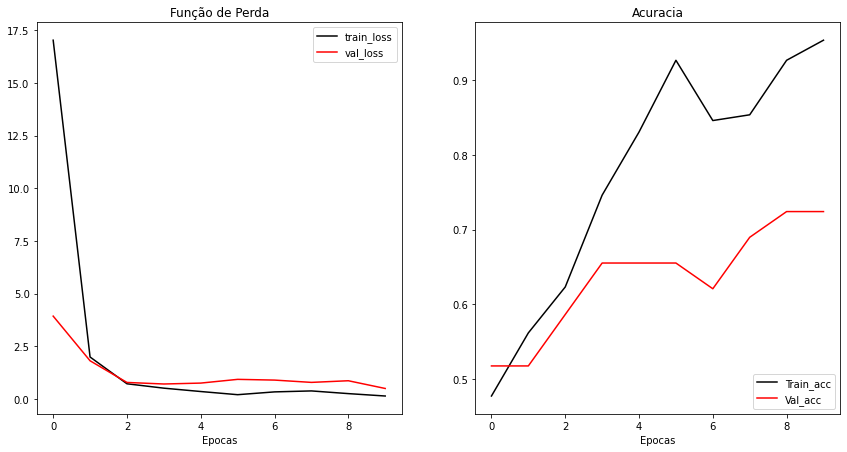

In [75]:
fig = plt.figure(figsize=(14.4,7.2))

#grafico da funçao de perda
ax = fig.add_subplot(1,2,1)
ax.plot(epoca,train_loss,'black',label="train_loss")
ax.plot(epoca,val_loss,'red',label='val_loss')
ax.set_title('Função de Perda')
ax.set_xlabel("Epocas")
ax.legend(loc="upper right")

#grafico da acuracia
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epoca,train_acc,'black',label="Train_acc")
ax2.plot(epoca,val_acc,'red',label = "Val_acc")
ax2.set_title("Acuracia")
ax2.set_xlabel("Epocas")
ax2.legend(loc='lower right')



### Matriz de confusao

In [50]:
matriz_confusao = confusion_matrix(y_teste, resultados)

In [76]:
mat =  pd.DataFrame(matriz_confusao,index=[['Real','Real'],['Regula/Mild','Severe/Critically ill']],columns = [['Prevista','Prevista'],['Regula/Mild','Severe/Critically ill']])

In [ ]:
fig_2 = plt.figure()
ax =sns.heatmap(mat,annot=True)
ax.set_xlabel('Previsto')
ax.set_ylabel('Real')

 ## CNN-3D

In [23]:
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Conv3D(filters = 16, kernel_size = [3,3,3],padding = 'same',
                                     data_format = "channels_last", input_shape = (150,64,64,1)))
model_cnn.add(tf.keras.layers.MaxPooling3D(pool_size = (3,3,3),padding = 'valid', data_format = 'channels_last'))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(50,activation ='relu'))
model_cnn.add(tf.keras.layers.Dense(25,activation ='relu'))
model_cnn.add(tf.keras.layers.Dense(2,activation ='softmax'))

model_cnn.summary()
            

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 150, 64, 64, 16)   448       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 50, 21, 21, 16)    0         
_________________________________________________________________
flatten (Flatten)            (None, 352800)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                17640050  
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 52        
Total params: 17,641,825
Trainable params: 17,641,825
Non-trainable params: 0
____________________________________________

In [25]:
model_cnn.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [26]:
with tf.device('CPU'):
    history_cnn = model_cnn.fit(x=X,y=y,
                  validation_split=0.1,
                  epochs = 10,
                  batch_size = 16)

Epoch 1/10
17/17 [==============================] - 194s 11s/step - loss: 1094.9486 - accuracy: 0.5577 - val_loss: 142.5757 - val_accuracy: 0.5517
Epoch 2/10
17/17 [==============================] - 193s 11s/step - loss: 67.9219 - accuracy: 0.7000 - val_loss: 50.2652 - val_accuracy: 0.5172
Epoch 3/10
17/17 [==============================] - 194s 11s/step - loss: 21.3794 - accuracy: 0.7692 - val_loss: 34.3635 - val_accuracy: 0.5517
Epoch 4/10
17/17 [==============================] - 193s 11s/step - loss: 13.8944 - accuracy: 0.8038 - val_loss: 44.8693 - val_accuracy: 0.7241
Epoch 5/10
17/17 [==============================] - 193s 11s/step - loss: 13.5619 - accuracy: 0.8462 - val_loss: 39.6734 - val_accuracy: 0.6897
Epoch 6/10
17/17 [==============================] - 193s 11s/step - loss: 3.1888 - accuracy: 0.9231 - val_loss: 40.2440 - val_accuracy: 0.6897
Epoch 7/10
17/17 [==============================] - 193s 11s/step - loss: 3.3408 - accuracy: 0.9231 - val_loss: 39.7973 - val_accuracy

In [29]:
with tf.device('CPU'):
    resultado_cnn = model_cnn.predict(teste)

In [30]:
resultado_cnn = resultado_cnn.argmax(axis = 1)

In [32]:
resultado_cnn

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1])

In [39]:
try:
    if y_teste.shape[1] != None:
        y_teste  =  y_teste.argmax(axis = 1)
except:
    pass

In [40]:
y_teste

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0])

In [42]:
cnn_acc_score = accuracy_score(y_teste,resultado_cnn) * 100
cnn_pre_score = precision_score(y_teste,resultado_cnn) * 100
cnn_re_score = recall_score(y_teste,resultado_cnn) * 100
cnn_f_score = f1_score(y_teste,resultado_cnn) * 100
cnn_auc_score = roc_auc_score(y_teste,resultado_cnn) * 100

In [43]:
print("acuracia:{:.2f}%".format(cnn_acc_score))
print("precisao:{:.2f}%".format(cnn_pre_score))
print("revocaçao:{:.2f}%".format(cnn_re_score))
print("f1:{:.2f}%".format(cnn_f_score))
print("AUC:{:.2f}%".format(cnn_auc_score))

acuracia:58.90%
precisao:57.45%
revocaçao:72.97%
f1:64.29%
AUC:58.71%


### Gerando os graficos

In [44]:
epoca = history_cnn.epoch
train_loss = history_cnn.history['loss']
train_acc = history_cnn.history['accuracy']
val_loss = history_cnn.history['val_loss']
val_acc = history_cnn.history['val_accuracy']

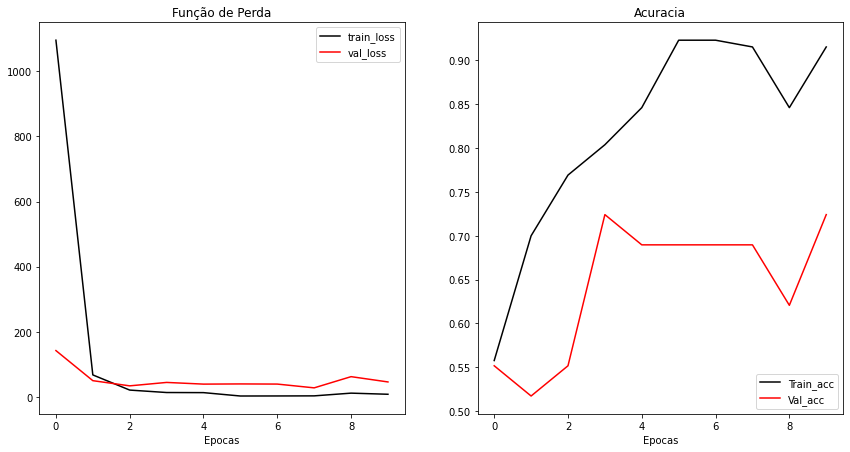

In [47]:
fig = plt.figure(figsize=(14.4,7.2))

#grafico da funçao de perda
ax = fig.add_subplot(1,2,1)
ax.plot(epoca,train_loss,'black',label="train_loss")
ax.plot(epoca,val_loss,'red',label='val_loss')
ax.set_title('Função de Perda')
ax.set_xlabel("Epocas")
ax.legend(loc="upper right")

#grafico da acuracia
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epoca,train_acc,'black',label="Train_acc")
ax2.plot(epoca,val_acc,'red',label = "Val_acc")
ax2.set_title("Acuracia")
ax2.set_xlabel("Epocas")
ax2.legend(loc='lower right')

### Matriz de confusao

In [56]:
matriz_confusao_cnn = confusion_matrix(y_teste, resultado_cnn)
mat_cnn =  pd.DataFrame(matriz_confusao_cnn,index=['Regula/Mild','Severe/Critically ill'],
                    columns = ['Regula/Mild','Severe/Critically ill'])

Text(32.99999999999999, 0.5, 'Real')

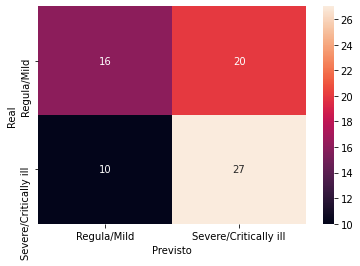

In [60]:
fig_2 = plt.figure()
ax =sns.heatmap(mat_cnn,annot=True)
ax.set_xlabel('Previsto')
ax.set_ylabel('Real')